<a href="https://colab.research.google.com/github/ShriVarshaan/pytorch-learning-log/blob/main/neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification is predicting whether one thing is one or the other

###Making classification data

In [1]:
from sklearn.datasets import make_circles

#Making a 1000 samples
n_samples = 1000

#Create circles

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42) #random_staet is equal to setting a random seed

In [2]:
len(X), len(y)

(1000, 1000)

In [3]:
X[:1]

array([[0.75424625, 0.23148074]])

In [4]:
y[:5]

array([1, 1, 1, 1, 0])

In [5]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [6]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0], #X[:, 0] = take all the rows and take the first column from them
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [7]:
circles.label.value_counts()

,count
label,
1,500
0,500


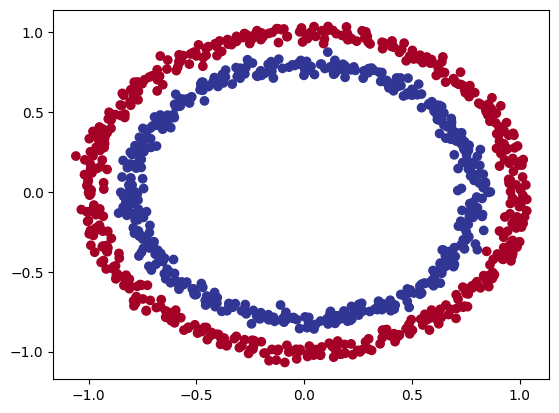

In [8]:
#Visualising the data
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.show()

Note: the data we're working with is called toy data, a dataset that is small enough to experiment on but still large enough to practice the fundamentals

In [9]:
X_sample = X[0]
y_sample = y[0]

print("Values for one sample of X:", X_sample)
print("values for one sample of y", y_sample)

print("Shape for one sample of X:", X_sample.shape)
print("Shape for one sample of y:", y_sample.shape)

Values for one sample of X: [0.75424625 0.23148074]
values for one sample of y 1
Shape for one sample of X: (2,)
Shape for one sample of y: ()


###Turning our data into tensors and creating train and test splits

In [10]:
import torch

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [11]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [12]:
X.dtype

torch.float32

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [14]:
len(X_train)

800

###Building a model

In [15]:
import torch
from torch import nn

if torch.cuda.is_available():
  device="cuda"
else:
  device="cpu"



In [16]:
device

'cuda'

In [17]:
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    #creating 2 linear layers that are capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2,
                             out_features=5) #The out features here is arbitrary, generally it is a multiple of 8, these are the hidden features, The higher it is the better chance our model has to learn the pattern
    self.layer_2 = nn.Linear(in_features=5,
                             out_features=1)
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x goes into layer 1, the output of layer 1 goes into layer 2

In [18]:
model_0 = CircleModel().to(device)
model_0

CircleModel(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [19]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [20]:
#Replicating our model using nn.Sequential


model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

#This outputs the same as the way we made the class, however the benefit of subclassing is that for complex models it is easier with making the subclass of nn.Module
#We could also put this inside the class we made

In [21]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [22]:
class CircleModelSequential(nn.Module):
  def __init__(self):
    super().__init__()
    self.two_layer = nn.Sequential(
        nn.Linear(in_features=2, out_features=5),
        nn.Linear(in_features=5, out_features=1)
    )
  def forward(self, x):
    return self.two_layer(x)

#This is equivalent to our CircleModel

In [23]:
model_0.state_dict()
#the number of weights in the first layer is 10 as it is 2*5 where 2 is in features and 5 is out
#nuumber of bias is equal to the number of out-featuers

OrderedDict([('0.weight',
              tensor([[-0.0510, -0.2954],
                      [-0.3803, -0.0778],
                      [-0.7057, -0.5422],
                      [ 0.3284, -0.5260],
                      [ 0.1163,  0.4803]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.5225, -0.1739,  0.2736,  0.5585, -0.4421], device='cuda:0')),
             ('1.weight',
              tensor([[-0.1383, -0.1171, -0.0387, -0.1477,  0.1865]], device='cuda:0')),
             ('1.bias', tensor([-0.2918], device='cuda:0'))])

In [24]:
#Making predictions

model_0.eval()
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))


In [25]:
len(untrained_preds)

200

In [26]:
untrained_preds.shape

torch.Size([200, 1])

In [27]:
torch.round(untrained_preds)

tensor([[-0.],
        [-0.],
        [-1.],
        [-0.],
        [-1.],
        [-1.],
        [-0.],
        [-0.],
        [-1.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-1.],
        [-1.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-1.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-0.],
        [-0.],
        [-0.],
        [-1.],
        [-0.],
        [-0.],
        [-0.],
        [-1.],
        [-1.],
        [-1.],
        [-0.],
        [-1.],
        [-0.],
        [-1.],
        [-0.],
        [-0.],
        [-1.],
        [-0.],
        [-0.],
        [-1.],
        [-0.],
        [-0.],
        [-1.],
        [-1.],
        [-0.],
        [-1.],
        [-0.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-0.],
        [-1.],
        [-1.],
        [-0.],
        [-0.],
        [-

###Setting up the optimizer and loss function

We will use cross entropy loss for classification

In [28]:
loss_fn = nn.BCEWithLogitsLoss() #has sigmoid activation function built in
#just bce loss requires inputs to have gone through sigmoid activation before it is passed through

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)


In [29]:
#Calculating accuracy

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() #.eq will create a tensor with 1 if they are equal and 0 if they aren't. sum() will give us a single valued tensor adding up all the trues. item() converts that tensor into a regular python number
  acc = (correct/(len(y_pred))) * 100
  return acc

###Train model



In [30]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.3761],
        [-0.2897],
        [-0.6308],
        [-0.3039],
        [-0.6755]], device='cuda:0')

In [31]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0510, -0.2954],
                      [-0.3803, -0.0778],
                      [-0.7057, -0.5422],
                      [ 0.3284, -0.5260],
                      [ 0.1163,  0.4803]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.5225, -0.1739,  0.2736,  0.5585, -0.4421], device='cuda:0')),
             ('1.weight',
              tensor([[-0.1383, -0.1171, -0.0387, -0.1477,  0.1865]], device='cuda:0')),
             ('1.bias', tensor([-0.2918], device='cuda:0'))])

In [32]:
#Using sigmoid activation to turn our logits into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4071],
        [0.4281],
        [0.3473],
        [0.4246],
        [0.3373]], device='cuda:0')

In [33]:
#now we get the probabilites which we can round to 0 or 1 to get the class
# if y_pred_probs >= 0.5 y =1
# else it is y = 0, we could also change these but we usually don't
y_labels = torch.round(y_pred_probs)

In [34]:
y_labels.squeeze()

tensor([0., 0., 0., 0., 0.], device='cuda:0')

In [35]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_0.train()

  y_logits = model_0(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits)) #Turn logits into pred probs into pred labels

  loss = loss_fn(y_logits, #because bcewithlogitsloss expects logits as input if it was without logits we would pass the preds
                 y_train)

  acc = accuracy_fn(y_train, y_preds) #custom accuracy function we made


  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    y_eval_logits = model_0(X_test).squeeze()
    y_eval_probs = torch.sigmoid(y_eval_logits)
    y_evals = torch.round(y_eval_probs)

    eval_loss = loss_fn(y_evals, y_test)
    eval_acc = accuracy_fn(y_test, y_evals)

  if epoch%10 == 0:
    print("epoch:", epoch)
    print("Loss:", loss, "accuracy %:", acc)
    print("eval loss:", eval_loss, "eval accuracy %:", eval_acc)


epoch: 0
Loss: tensor(0.7284, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>) accuracy %: 50.0
eval loss: tensor(0.6931, device='cuda:0') eval accuracy %: 50.0
epoch: 10
Loss: tensor(0.7055, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>) accuracy %: 50.0
eval loss: tensor(0.6931, device='cuda:0') eval accuracy %: 50.0
epoch: 20
Loss: tensor(0.6974, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>) accuracy %: 50.0
eval loss: tensor(0.6931, device='cuda:0') eval accuracy %: 50.0
epoch: 30
Loss: tensor(0.6946, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>) accuracy %: 50.0
eval loss: tensor(0.6931, device='cuda:0') eval accuracy %: 50.0
epoch: 40
Loss: tensor(0.6936, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>) accuracy %: 50.0
eval loss: tensor(0.6931, device='cuda:0') eval accuracy %: 50.0
epoch: 50
Loss: tensor(0.6933, device='cuda:0',
       grad_fn=<BinaryC

In [36]:
#We have 500 red dots and blue dots, so we are basically trying to predict heads or tails here
#Our model is doing as well as guessing

In [37]:
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
  print("Already exists")
else:
  print("downloading")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)


downloading


In [38]:
from helper_functions import plot_predictions, plot_decision_boundary

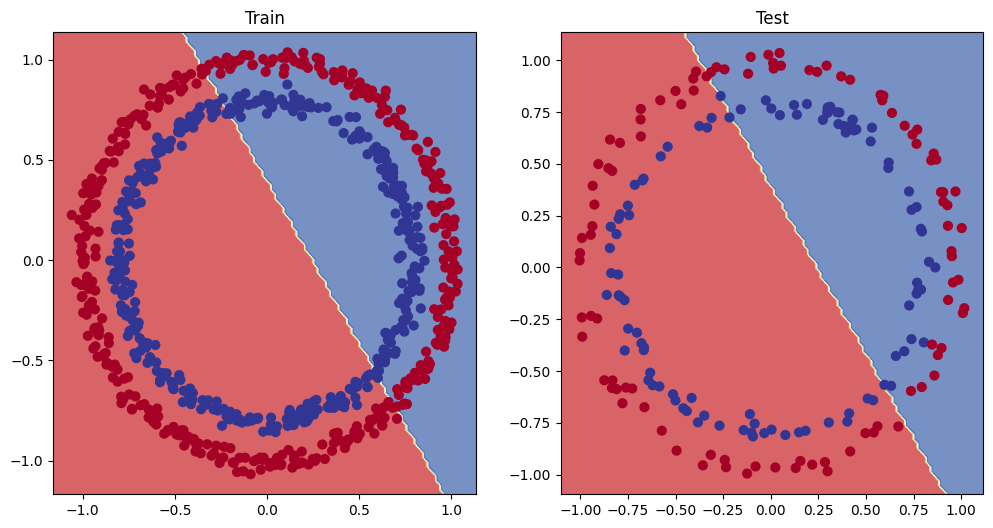

In [39]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

###Improving a model from the model perspective

These may or may not work

* Add more layers -- gives the model more chances to learn about the patterns in the data

* Add more hidden units -- go form 5 hidden units to 10 in our case

* Fit for longer -- more epochs

* Changing the activation function

* Change the learning rate

* Change the loss function

These options are all from the model's perspective as they all deal directly with the model and not with the data


Let's try and improve by
* Adding more hidden units
* Increase the number of layers
* Increase the number of epochs


In [40]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0505, -0.2932],
                      [-0.3782, -0.0773],
                      [-0.7061, -0.5411],
                      [ 0.3289, -0.5237],
                      [ 0.1149,  0.4779]])),
             ('0.bias', tensor([ 0.5047, -0.2107,  0.2756,  0.5400, -0.4094])),
             ('1.weight',
              tensor([[ 0.0004, -0.1619,  0.0477, -0.0033,  0.0688]])),
             ('1.bias', tensor([-0.0259]))])

In [44]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):

    return self.layer_3(self.layer_2(self.layer_1(x))) #this leverages speed ups where possible behind the scenes

In [45]:
model_1 = CircleModelV1()
model_1.to(device)

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [46]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [47]:
loss_fn1 = nn.BCEWithLogitsLoss()

optimizer1 = torch.optim.SGD(model_1.parameters(),
                             lr=0.1)

In [48]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.6386, -0.6007],
                      [ 0.5459,  0.1177],
                      [-0.2296,  0.4370],
                      [ 0.1102,  0.5713],
                      [ 0.0773, -0.2230],
                      [ 0.1900, -0.1918],
                      [ 0.2976,  0.6313],
                      [ 0.4087, -0.3091],
                      [ 0.4082,  0.1265],
                      [ 0.3591, -0.4310]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.7000, -0.2732, -0.5424,  0.5802,  0.2037,  0.2929,  0.2236, -0.0123,
                       0.5534, -0.5024], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.0199, -0.2158,  0.0975, -0.1089,  0.0969, -0.0659,  0.2623, -0.1874,
                       -0.1886, -0.1886],
                      [ 0.2844,  0.1054,  0.3043, -0.2610, -0.3137, -0.2474, -0.2127,  0.1281,
                        0.1132,  0.2628],
                      [-0.1633, -0.215

In [53]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
for epoch in range(epochs):
  model_1.train()

  y_pred_logits = model_1(X_train).squeeze()

  loss = loss_fn1(y_pred_logits, y_train)

  y_pred = torch.round(torch.sigmoid(y_pred_logits))
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  optimizer1.zero_grad()

  loss.backward()

  optimizer.step()

  if epoch % 100 == 0:
    print("Epoch", epoch)

    print("Training loss", loss, "Training Accuracy:", acc)
    model_1.eval()
    with torch.inference_mode():
      y_eval_logits = model_1(X_test).squeeze()
      y_eval_pred = torch.round(torch.sigmoid(y_eval_logits))
      testing_loss = loss_fn1(y_eval_logits, y_test)
      acc_eval = accuracy_fn(y_true=y_test,
                     y_pred=y_eval_pred)
    print("Testing loss", testing_loss, "Testing Accuracy:", acc_eval)


Epoch 0
Training loss tensor(0.7029, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>) Training Accuracy: 50.0
Testing loss tensor(0.7044, device='cuda:0') Testing Accuracy: 50.0
Epoch 100
Training loss tensor(0.7029, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>) Training Accuracy: 50.0
Testing loss tensor(0.7044, device='cuda:0') Testing Accuracy: 50.0
Epoch 200
Training loss tensor(0.7029, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>) Training Accuracy: 50.0
Testing loss tensor(0.7044, device='cuda:0') Testing Accuracy: 50.0
Epoch 300
Training loss tensor(0.7029, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>) Training Accuracy: 50.0
Testing loss tensor(0.7044, device='cuda:0') Testing Accuracy: 50.0
Epoch 400
Training loss tensor(0.7029, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>) Training Accuracy: 50.0
Testing loss tensor(0.7044, device='cuda:0') Testi

In [51]:
y_test[:5].dtype

torch.float32

In [52]:
y_train.dtype

torch.float32